In [2]:
#Step 1: Install Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

✅ Columns in dataset:
 ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']

🔍 First 5 rows:
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435

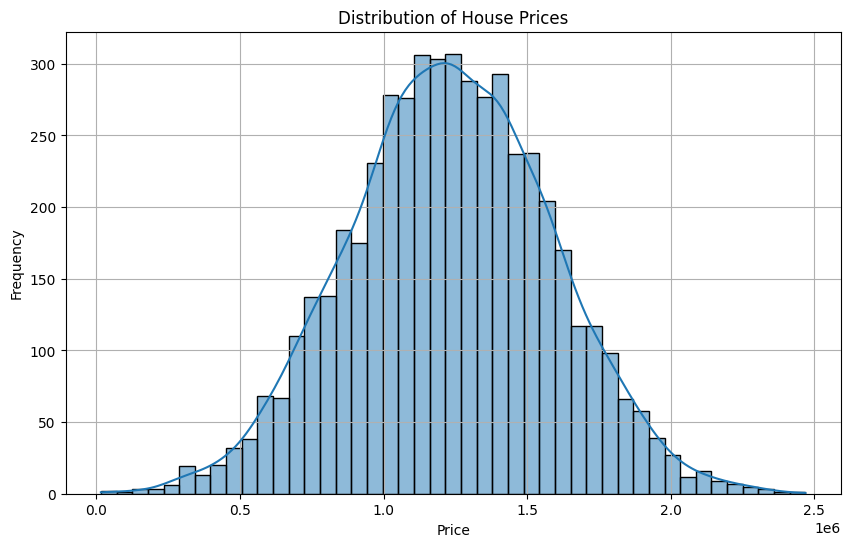

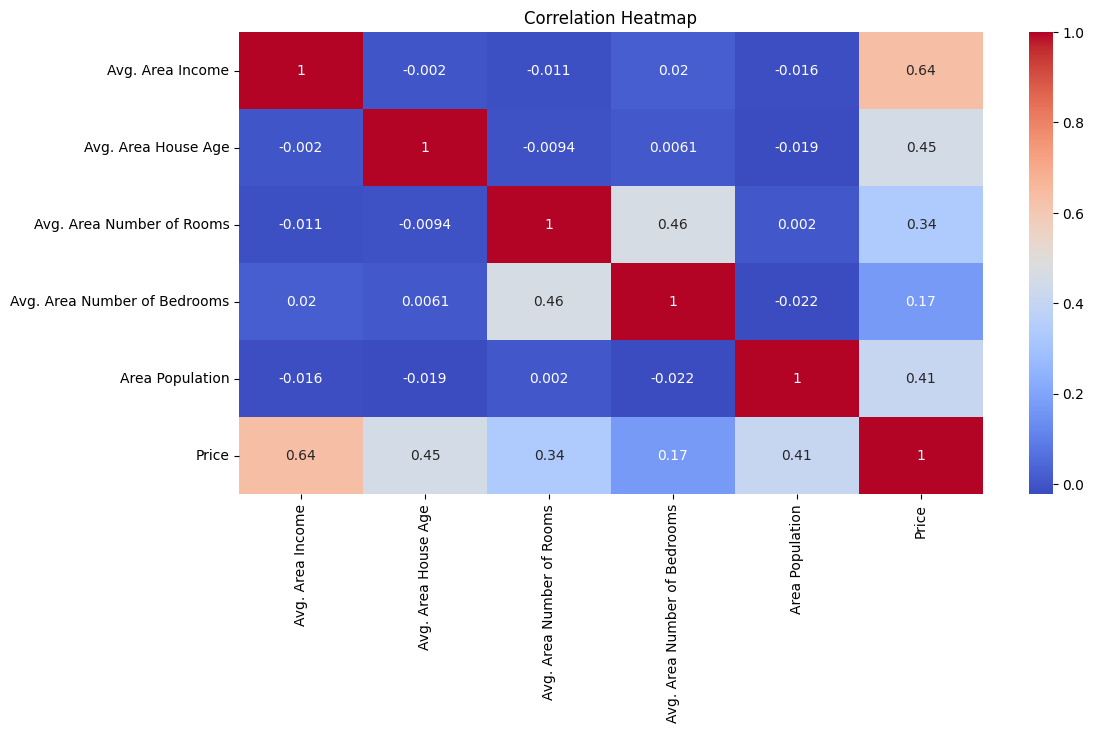


📊 Linear Regression Performance:
MAE : 80879.09722219854
RMSE: 100444.0605486534
R2  : 0.9179971706985147

📊 Gradient Boosting Performance:
MAE : 87389.42051274172
RMSE: 109431.57748806823
R2  : 0.9026657618282339


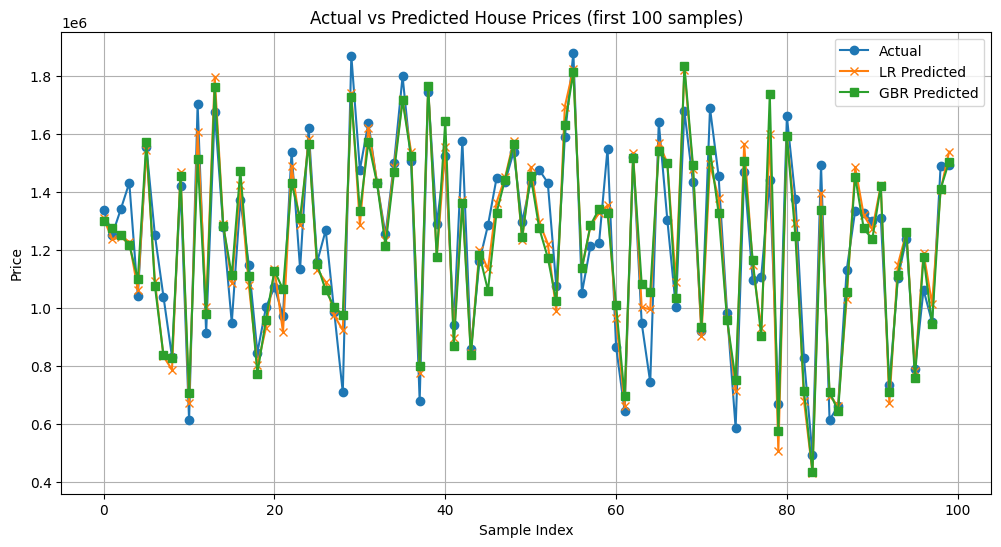

In [8]:
# 📌 Task 6: House Price Prediction - Updated for California Housing Dataset

# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 2. Load Dataset ===
df = pd.read_csv('/content/housing.csv')  # Use your actual path

# === 3. Check columns ===
print("✅ Columns in dataset:\n", df.columns.tolist())
print("\n🔍 First 5 rows:\n", df.head())

# === 4. Preprocessing ===
# Drop any irrelevant columns (if present)
# Check for missing values
print("\n🧹 Missing values:\n", df.isnull().sum())

# Drop rows with missing data
df = df.dropna()

# === 5. Visualization ===
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# === 6. Feature Selection ===
# Select features and target
feature_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population'] # Updated feature columns based on available data
X = df[feature_columns]
y = df['Price'] # Changed to 'Price'

# === 7. Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 8. Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 9. Modeling ===

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Gradient Boosting (no scaling needed)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# === 10. Evaluation Function ===
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")

# === 11. Plot Predictions ===
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_lr[:100], label='LR Predicted', marker='x')
plt.plot(y_pred_gbr[:100], label='GBR Predicted', marker='s')
plt.title("Actual vs Predicted House Prices (first 100 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()